#### Importing some important libraries

In [1]:
# import key packages – required:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import timedelta
from matplotlib.dates import MonthLocator, DateFormatter

## 1. Task
<b>Please ensure the source data files are in the same location as this python file.</b>

1. First we need to read the data stored in csv file in gzip compression and then convert the applicable column values to metric or derived units.

In [2]:
nycflights_df = pd.read_csv('nycflights13_weather.csv.gz', compression='gzip', quotechar='"', delimiter=",", skiprows = 42)
nycflights_df.head(5)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


In [6]:
nycflights_df.loc[:,"day"]

0         1
1         1
2         1
3         1
4         1
         ..
26125    30
26126    30
26127    30
26128    30
26129    30
Name: day, Length: 26130, dtype: int64

In [3]:
nycflights_df['temp'] = ((nycflights_df['temp'] - 32) * 5) / 9
nycflights_df['dewp'] = ((nycflights_df['dewp'] - 32) * 5) / 9
nycflights_df['wind_speed'] = nycflights_df['wind_speed'] * 1.6
nycflights_df['wind_gust'] = nycflights_df['wind_gust'] * 1.6
nycflights_df['precip'] = nycflights_df['precip'] * 25.4
nycflights_df['visib'] = nycflights_df['visib'] * 1.6
nycflights_df.head(5)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,16.571232,19.069842,0.0,1013.9,16.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,22.094976,25.426456,0.0,1013.0,16.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,20.253728,23.307585,0.0,1012.6,16.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,22.094976,25.426456,0.0,1012.7,16.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,23.936224,27.545328,0.0,1012.8,16.0,2013-01-01 05:00:00


We are reading the csv data in gzip compression in pandas dataframe. Since the actual data starts from row 43, we are skipping the first 42 rows.

After data is copied in pandas dataframe, we are simply replacing (overwriting) the original values with the converted values as applicable. For e.g. temp and dewp which is Fahrenheit is converted to Celcius. So the updated dataframe will contain data in metric or derived units.

2. We need to change the datatype of time_hour column to datetime64 type and then make it consistent with month, day and hour by substracting 1 hour.

In [4]:
nycflights_df['time_hour'] = nycflights_df['time_hour'].astype('datetime64')
nycflights_df['time_hour'] = pd.to_datetime(nycflights_df['time_hour']) - timedelta(hours=1)
nycflights_df.head(5)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,16.571232,19.069842,0.0,1013.9,16.0,2013-01-01 00:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,22.094976,25.426456,0.0,1013.0,16.0,2013-01-01 01:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,20.253728,23.307585,0.0,1012.6,16.0,2013-01-01 02:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,22.094976,25.426456,0.0,1012.7,16.0,2013-01-01 03:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,23.936224,27.545328,0.0,1012.8,16.0,2013-01-01 04:00:00


We are specifying the astype as 'datetime64' for time_hour column of the dataframe and then substracting 1 hour from time_hour column by passing it to to_datetime function.

3. Next, we need to compute daily mean temperature of each day for JFK airport. Since there are 24 hours in a day, we just need a mean temperature value of that day.

In [5]:
jfkmeantemp_df = pd.DataFrame(nycflights_df[nycflights_df['origin'] == 'JFK'].groupby(pd.to_datetime(nycflights_df['time_hour']).dt.normalize())['temp'].mean())
jfkmeantemp_df = jfkmeantemp_df.reset_index()
#jfkmeantemp_df.set_index("time_hour")
jfkmeantemp_df['time_hour'] = pd.to_datetime(jfkmeantemp_df['time_hour']).dt.date
#jfkmeantemp_df.set_index('time_hour',inplace=True)
jfkmeantemp_df.head(5)

,time_hour,temp
0,2013-01-01,3.817391
1,2013-01-02,-1.920833
2,2013-01-03,-1.237500
3,2013-01-04,1.129167
4,2013-01-05,2.720833


We are using a groupby function on the 'nycflights_df' dataframe and also specifying the origin = 'JFK'. In the group by function we are specifying on which column we need to group by and which column needs to be used for aggregation which in our case is the temp column and the aggregate function is mean().
We are storing this data in a different dataframe 'jfkmeantemp_df'.

4. Now we need to plot a line chart the mean temperature for JFK airport. X-axis should show month-names and Y-axis should show the temperature.

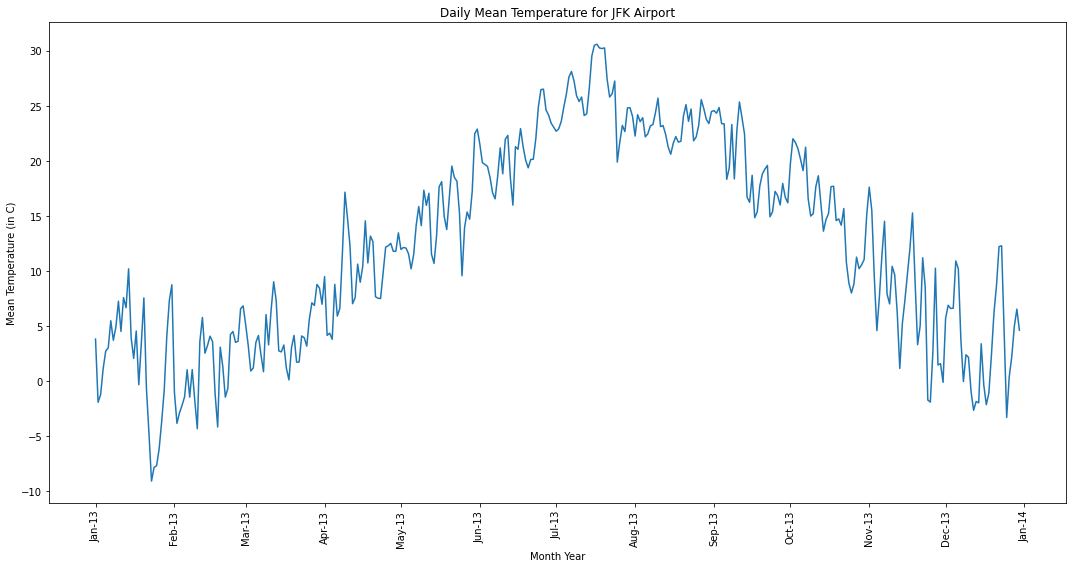

In [6]:
# setting figure size to 15, 8
plt.figure(figsize=(15,8))
plt.plot(jfkmeantemp_df.time_hour,jfkmeantemp_df.temp)
ax = plt.gca()
# plotting the "temp" column alone
#defines the tick location 
ax.xaxis.set_major_locator(MonthLocator())
#defines the label format
ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
ax.tick_params(axis="x", labelrotation= 90)

# # Labelling the axes and setting a title
plt.xlabel("Month Year")
plt.ylabel("Mean Temperature (in C)")
plt.title("Daily Mean Temperature for JFK Airport")
plt.tight_layout()
plt.show()

As can be seen highest daily average temperature was recorded between July and August whereeas the lowest average temperature was recording around January end. For plotting the above chart, we need to pass the x (time_hour column of the dataframe) and y value (temp column of the dataframe) in the plot function. plot function will by default plot a line graph (as can be seen above). Next we need to format the month names properly. For that we have used set_major_locator and set_major_formatter functions. We used the x_label, y_label and title functions of the plt object to set the x label, y label and title of the chart.

5. Now we need to find out the 5 hottest days based on the daily mean temperature.

In [7]:
jfktop5hottestday_df = jfkmeantemp_df.sort_values(by = 'temp', ascending = False).head(5)
jfktop5hottestday_df

,time_hour,temp
197,2013-07-17,30.579167
196,2013-07-16,30.483333
200,2013-07-20,30.245833
198,2013-07-18,30.241667
199,2013-07-19,30.187500


We have used sort_values function of DataFrame to sort the temperature in descending order (ascending = False) and only considered first 5 rows and stored it in a separate variable.

## 2. Additional Tasks for Postgraduate

1. We also need to calculate the daily mean temperatures of the other 2 airports in NYC: EWR and LGA.

In [8]:
ewrmeantemp_df = pd.DataFrame(nycflights_df[nycflights_df['origin'] == 'EWR'].groupby(pd.to_datetime(nycflights_df['time_hour']).dt.normalize())['temp'].mean())
ewrmeantemp_df = ewrmeantemp_df.reset_index()
ewrmeantemp_df['time_hour'] = pd.to_datetime(ewrmeantemp_df['time_hour']).dt.date
ewrmeantemp_df.head(5)

,time_hour,temp
0,2013-01-01,3.600000
1,2013-01-02,-1.758333
2,2013-01-03,-1.412500
3,2013-01-04,0.820833
4,2013-01-05,2.629167


In [9]:
lgameantemp_df = pd.DataFrame(nycflights_df[nycflights_df['origin'] == 'LGA'].groupby(pd.to_datetime(nycflights_df['time_hour']).dt.normalize())['temp'].mean())
lgameantemp_df = lgameantemp_df.reset_index()
lgameantemp_df['time_hour'] = pd.to_datetime(lgameantemp_df['time_hour']).dt.date
lgameantemp_df.head(5)

,time_hour,temp
0,2013-01-01,4.021739
1,2013-01-02,-1.820833
2,2013-01-03,-1.275000
3,2013-01-04,1.812500
4,2013-01-05,3.187500


We have used the same method for calculating the mean temperature for EWR and LGA airports just like how we did for JFK.

2. Lastly, we need to display the mean temperature for all the three airports in one single chart with 3 different legends. 

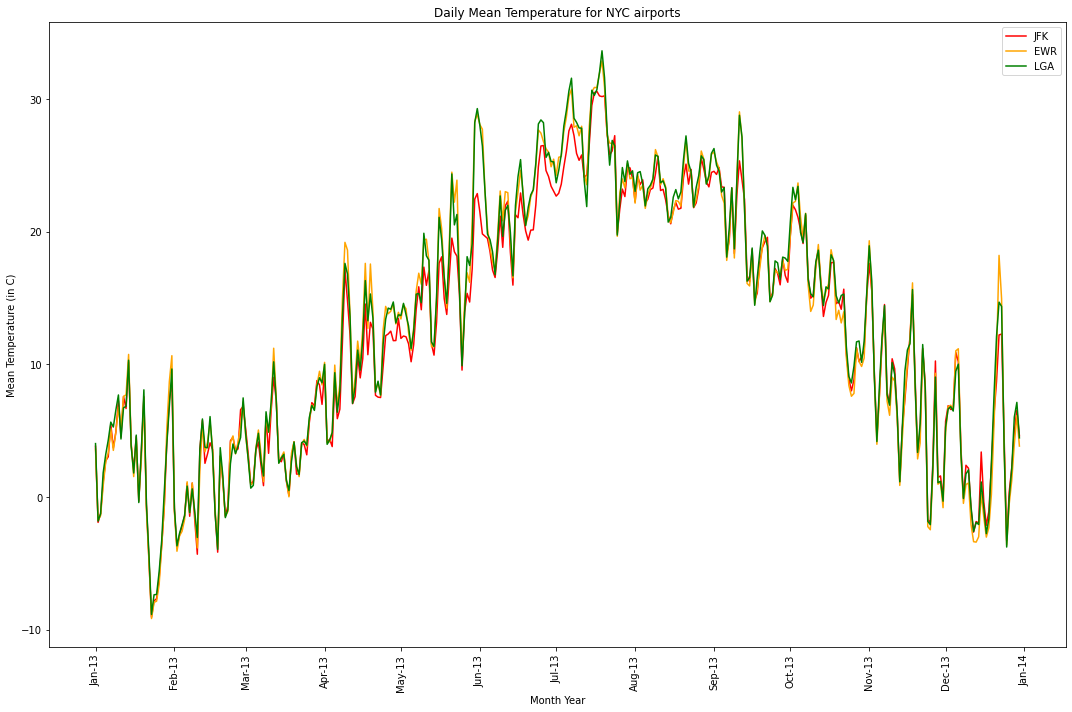

In [10]:
# Creating a plot of dimension of width = 15 and height = 10.
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["figure.autolayout"] = True

# Plotting the JFK temperature data and getting axis object of the plot 'ax'
ax = jfkmeantemp_df.plot(x='time_hour', y='temp', label = 'JFK', color = 'red')

# Pass the JFK axis object to EWR and LGA ax parameter for plotting all the three charts in one plot.
ewrmeantemp_df.plot(ax=ax, x='time_hour', y='temp', label = 'EWR', color = 'orange')
lgameantemp_df.plot(ax=ax, x='time_hour', y='temp', label = 'LGA', color = 'green')

plt.xlabel("Month Year")
plt.ylabel("Mean Temperature (in C)")
plt.title("Daily Mean Temperature for NYC airports")
plt.legend()


# plotting the "temp" column alone
# defines the tick location 
ax.xaxis.set_major_locator(MonthLocator())
# defines the label format
ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
ax.tick_params(axis="x", labelrotation= 90)

As we can see, the plots for all the 3 airports are almost co-inciding with each other in some places. The highest mean temperature was recorded by both LGA and EWR airports in July 2013 whereas the lowest mean temperature was recorded by all the three airports by the end of January 2013.

## 3. Optional Features

1. Next we need to mark the days with greater mean temperature than in the preceding day in red and those which are smaller in blue. I have plotted the chart for all the 3 airports separately.

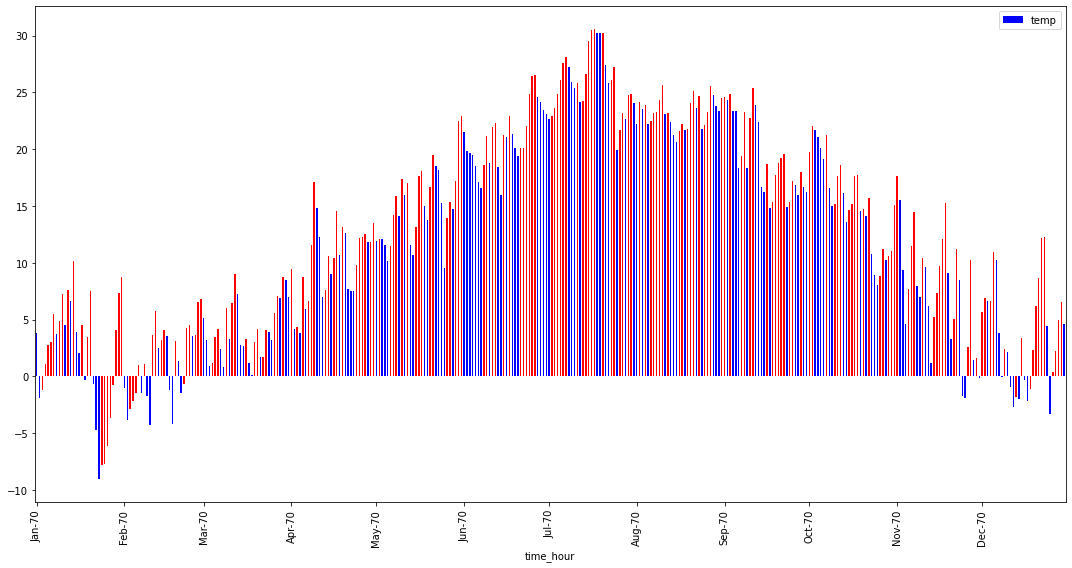

In [11]:
jfkmeantemp_df['Color'] = jfkmeantemp_df.temp.diff().apply(lambda x: 'red' if x > 0 else 'blue')

plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["figure.autolayout"] = True

ax = jfkmeantemp_df.plot(x='time_hour', y='temp', kind = 'bar', color = jfkmeantemp_df['Color'])
# plotting the "temp" column alone
# defines the tick location 
ax.xaxis.set_major_locator(MonthLocator())
# defines the label format
ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
ax.tick_params(axis="x", labelrotation= 90)

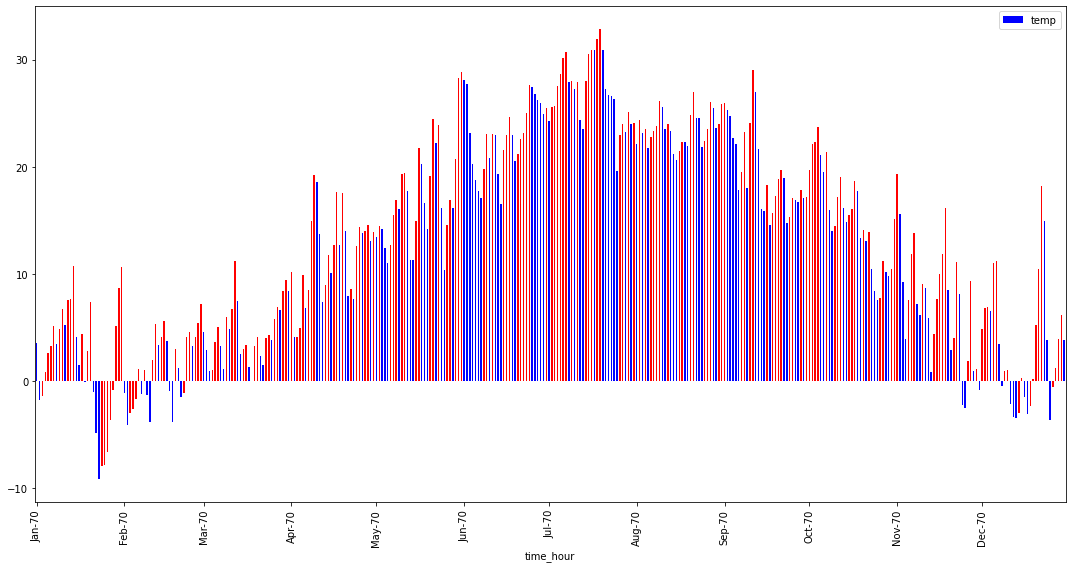

In [12]:
ewrmeantemp_df['Color'] = ewrmeantemp_df.temp.diff().apply(lambda x: 'red' if x > 0 else 'blue')

plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["figure.autolayout"] = True

ax = ewrmeantemp_df.plot(x='time_hour', y='temp', kind = 'bar', color = ewrmeantemp_df['Color'])
# plotting the "temp" column alone
# defines the tick location 
ax.xaxis.set_major_locator(MonthLocator())
# defines the label format
ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
ax.tick_params(axis="x", labelrotation= 90)

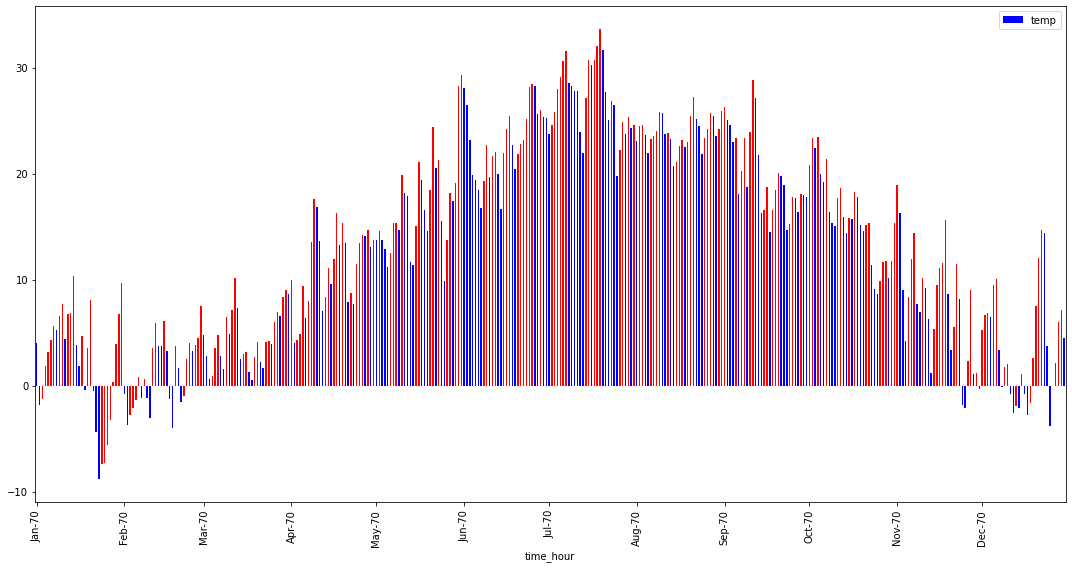

In [13]:
lgameantemp_df['Color'] = lgameantemp_df.temp.diff().apply(lambda x: 'red' if x > 0 else 'blue')

plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["figure.autolayout"] = True

ax = lgameantemp_df.plot(x='time_hour', y='temp', kind = 'bar', color = lgameantemp_df['Color'])
# plotting the "temp" column alone
# defines the tick location 
ax.xaxis.set_major_locator(MonthLocator())
# defines the label format
ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
ax.tick_params(axis="x", labelrotation= 90)

For plotting the above charts for various airports, we are using a lamda function to determine red or blue lines. Once the colors determined, we are storing it as a separate column in the dataframe and passing it to the color parameter of the plot function.

2. We need to find 2 sets of row(s) with missing values: 

a. Rows where temperature is NA or null.

b. Complete row itself is omitted.

In [14]:
nycflights_jfk = pd.DataFrame(nycflights_df[nycflights_df['origin'] == 'JFK']) # Creating a new dataframe explicity for JFK
nycflights_jfk.shape

(8711, 15)

In [15]:
print("Rows with NA or missing value in Temperature column: \n",nycflights_jfk[nycflights_jfk['temp'].isnull()]) # Checking rows where temp is null

alldates=pd.DataFrame(pd.date_range(nycflights_jfk['time_hour'].min(),nycflights_jfk['time_hour'].max(), freq="1H",name="dates"))

Rows with NA or missing value in Temperature column: 
 Empty DataFrame
Columns: [origin, year, month, day, hour, temp, dewp, humid, wind_dir, wind_speed, wind_gust, precip, pressure, visib, time_hour]
Index: []


There are no rows where temp column is NA or blank.

In [16]:
# Creating a list of missing date_time entries in nycflights_jfk dataframe.
newlist = [x for x in list(alldates['dates'].unique()) if x not in list(nycflights_jfk['time_hour'].unique())]

missing_nycflights_jfk_df = pd.DataFrame(newlist, columns = ['time_hour'])
print(missing_nycflights_jfk_df)

             time_hour
0  2013-01-01 05:00:00
1  2013-02-21 05:00:00
2  2013-03-05 06:00:00
3  2013-03-31 01:00:00
4  2013-04-03 00:00:00
5  2013-08-13 04:00:00
6  2013-08-16 04:00:00
7  2013-08-19 21:00:00
8  2013-08-22 22:00:00
9  2013-08-23 00:00:00
10 2013-08-23 01:00:00
11 2013-10-26 00:00:00
12 2013-10-26 01:00:00
13 2013-10-26 02:00:00
14 2013-10-26 03:00:00
15 2013-10-26 04:00:00
16 2013-10-27 01:00:00
17 2013-11-01 07:00:00
18 2013-11-01 08:00:00
19 2013-11-03 00:00:00
20 2013-11-03 01:00:00
21 2013-11-03 02:00:00
22 2013-11-03 03:00:00
23 2013-11-03 04:00:00
24 2013-11-04 15:00:00


We have 25 missing entries in nycflights_jfk dataframe. There are no rows in nycflights_jfk dataframe where temperature alone is null or missing.

Please note, all the hours entry will show 1 hour less. Remember we have substracted 1 hour in Task 1.2.

3. Next we need to add the missing date-time information to the JFK data frame.

In [17]:
nycflights_jfk_columns = list(nycflights_jfk.columns.values)
nycflights_jfk_columns = nycflights_jfk_columns[0:14] # Removing time_hour from the list

for x in nycflights_jfk_columns:
    missing_nycflights_jfk_df[x] = np.nan

In [18]:
cols = list(missing_nycflights_jfk_df.columns.values) # Make a list of all the columns in the missing_nycflights_jfk dataframe
cols.pop(cols.index('time_hour')) # Remove time_hour from the list
missing_nycflights_jfk_df = missing_nycflights_jfk_df[cols+['time_hour']]

# Merge both the dataframe together 
nycflights_jfk = pd.concat([nycflights_jfk,missing_nycflights_jfk_df], axis=0)
nycflights_jfk.shape

(8736, 15)

Original JFK dataset had 8711 rows. With 24 additional rows added, the revised JFK dataset has 8736 rows now.

4. First we need to fill the missing temperature values (i.e. NANs) by linearly interpolating between the preceding and following non-missing data and then compute daily average temperatures

In [19]:
nycflights_jfk.reset_index(inplace = True, drop=True)
#nycflights_jfk.drop(columns=['index'], inplace=True)
nycflights_jfk = nycflights_jfk.sort_values(by=['time_hour'])
nycflights_jfk.head(8)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,JFK,2013.0,1.0,1.0,0.0,3.3,-5.0,54.51,240.0,25.777472,29.664199,0.0,1014.4,16.0,2013-01-01 00:00:00
1,JFK,2013.0,1.0,1.0,1.0,3.3,-4.4,57.04,250.0,27.618720,31.783071,0.0,1013.5,16.0,2013-01-01 01:00:00
2,JFK,2013.0,1.0,1.0,2.0,3.9,-3.9,56.77,240.0,31.301216,36.020813,0.0,1013.0,16.0,2013-01-01 02:00:00
3,JFK,2013.0,1.0,1.0,3.0,3.9,-3.3,59.37,240.0,29.459968,33.901942,0.0,1013.2,16.0,2013-01-01 03:00:00
4,JFK,2013.0,1.0,1.0,4.0,3.9,-3.9,56.77,260.0,23.936224,27.545328,0.0,1013.2,16.0,2013-01-01 04:00:00
8711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-01 05:00:00
5,JFK,2013.0,1.0,1.0,6.0,3.9,-3.3,59.37,260.0,20.253728,23.307585,0.0,1012.6,16.0,2013-01-01 06:00:00
6,JFK,2013.0,1.0,1.0,7.0,3.9,-3.3,59.37,270.0,18.412480,21.188714,0.0,1012.4,16.0,2013-01-01 07:00:00


In [20]:
nycflights_jfk_mod = nycflights_jfk.copy(deep=True) # Making a copy of the JFK airports weather data containing 25 empty rows
nycflights_jfk_mod.head(8)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,JFK,2013.0,1.0,1.0,0.0,3.3,-5.0,54.51,240.0,25.777472,29.664199,0.0,1014.4,16.0,2013-01-01 00:00:00
1,JFK,2013.0,1.0,1.0,1.0,3.3,-4.4,57.04,250.0,27.618720,31.783071,0.0,1013.5,16.0,2013-01-01 01:00:00
2,JFK,2013.0,1.0,1.0,2.0,3.9,-3.9,56.77,240.0,31.301216,36.020813,0.0,1013.0,16.0,2013-01-01 02:00:00
3,JFK,2013.0,1.0,1.0,3.0,3.9,-3.3,59.37,240.0,29.459968,33.901942,0.0,1013.2,16.0,2013-01-01 03:00:00
4,JFK,2013.0,1.0,1.0,4.0,3.9,-3.9,56.77,260.0,23.936224,27.545328,0.0,1013.2,16.0,2013-01-01 04:00:00
8711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-01 05:00:00
5,JFK,2013.0,1.0,1.0,6.0,3.9,-3.3,59.37,260.0,20.253728,23.307585,0.0,1012.6,16.0,2013-01-01 06:00:00
6,JFK,2013.0,1.0,1.0,7.0,3.9,-3.3,59.37,270.0,18.412480,21.188714,0.0,1012.4,16.0,2013-01-01 07:00:00


In [21]:
nycflights_jfk_mod.isnull().sum()

origin         25
year           25
month          25
day            25
hour           25
temp           25
dewp           25
humid          25
wind_dir       72
wind_speed     27
wind_gust      27
precip         25
pressure      855
visib          25
time_hour       0
dtype: int64

In [22]:
# Applying Linear interpolation
nycflights_jfk_mod['temp'] = nycflights_jfk_mod['temp'].interpolate(method='linear')
nycflights_jfk_mod['origin'] = 'JFK'
nycflights_jfk_mod.head(8)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,JFK,2013.0,1.0,1.0,0.0,3.3,-5.0,54.51,240.0,25.777472,29.664199,0.0,1014.4,16.0,2013-01-01 00:00:00
1,JFK,2013.0,1.0,1.0,1.0,3.3,-4.4,57.04,250.0,27.618720,31.783071,0.0,1013.5,16.0,2013-01-01 01:00:00
2,JFK,2013.0,1.0,1.0,2.0,3.9,-3.9,56.77,240.0,31.301216,36.020813,0.0,1013.0,16.0,2013-01-01 02:00:00
3,JFK,2013.0,1.0,1.0,3.0,3.9,-3.3,59.37,240.0,29.459968,33.901942,0.0,1013.2,16.0,2013-01-01 03:00:00
4,JFK,2013.0,1.0,1.0,4.0,3.9,-3.9,56.77,260.0,23.936224,27.545328,0.0,1013.2,16.0,2013-01-01 04:00:00
8711,JFK,NaN,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-01 05:00:00
5,JFK,2013.0,1.0,1.0,6.0,3.9,-3.3,59.37,260.0,20.253728,23.307585,0.0,1012.6,16.0,2013-01-01 06:00:00
6,JFK,2013.0,1.0,1.0,7.0,3.9,-3.3,59.37,270.0,18.412480,21.188714,0.0,1012.4,16.0,2013-01-01 07:00:00


In [23]:
nycflights_jfk_mod.isnull().sum()

origin          0
year           25
month          25
day            25
hour           25
temp            0
dewp           25
humid          25
wind_dir       72
wind_speed     27
wind_gust      27
precip         25
pressure      855
visib          25
time_hour       0
dtype: int64

There are no more null values present in temp column.

In [24]:
nycflights_jfk_mod_meantemp_df = pd.DataFrame(nycflights_jfk_mod.groupby(pd.to_datetime(nycflights_jfk_mod['time_hour']).dt.normalize())['temp'].mean())
nycflights_jfk_mod_meantemp_df = nycflights_jfk_mod_meantemp_df.reset_index()
#jfkmeantemp_df.set_index("time_hour")
nycflights_jfk_mod_meantemp_df['time_hour'] = pd.to_datetime(nycflights_jfk_mod_meantemp_df['time_hour']).dt.date
#jfkmeantemp_df.set_index('time_hour',inplace=True)
nycflights_jfk_mod_meantemp_df.head(5)

,time_hour,temp
0,2013-01-01,3.820833
1,2013-01-02,-1.920833
2,2013-01-03,-1.237500
3,2013-01-04,1.129167
4,2013-01-05,2.720833


In [25]:
jfkmeantemp_df[['time_hour','temp']].head(5)

,time_hour,temp
0,2013-01-01,3.817391
1,2013-01-02,-1.920833
2,2013-01-03,-1.237500
3,2013-01-04,1.129167
4,2013-01-05,2.720833


If we pay close attention, the mean temperature on 01-Jan-2013 in original JFK Mean Temp dataframe was 3.817391 whereas in the modified JFK Mean Temp dataframe (after finding missing rows, merging with original JFK Weather data, doing linear interpolation on temp column), the mean temperature on 01-Jan-2013 is 3.820833.

5. Next we will plot both the original JFK Mean Temp and Modified JFK Mean Temp

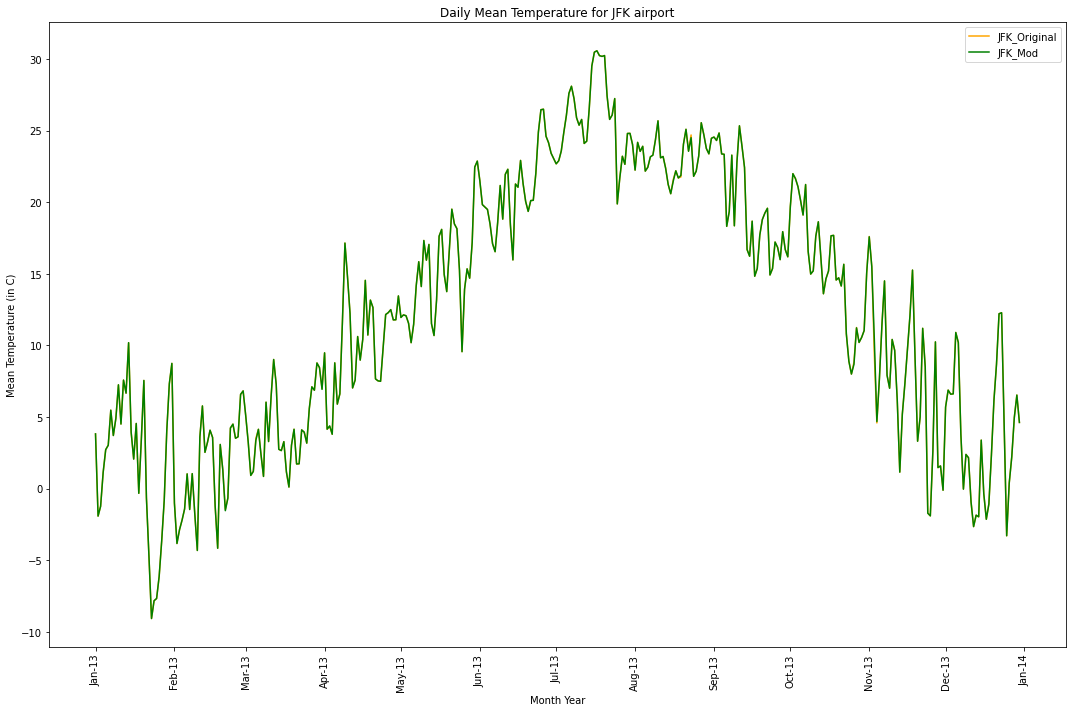

In [26]:
# Creating a plot of dimension of width = 15 and height = 10.
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["figure.autolayout"] = True

# Plotting the Original JFK temperature data and getting axis object of the plot 'ax'
ax = jfkmeantemp_df.plot(x='time_hour', y='temp', label = 'JFK_Original', color = 'orange')

# Pass the original JFK axis object to modified JFK Mean Temp dataframe plot function's ax parameter for plotting both the charts in one plot.
nycflights_jfk_mod_meantemp_df.plot(ax=ax, x='time_hour', y='temp', label = 'JFK_Mod', color = 'green')


plt.xlabel("Month Year")
plt.ylabel("Mean Temperature (in C)")
plt.title("Daily Mean Temperature for JFK airport")
plt.legend()


# plotting the "temp" column alone
# defines the tick location 
ax.xaxis.set_major_locator(MonthLocator())
# defines the label format
ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
ax.tick_params(axis="x", labelrotation= 90)

It seems both of them are co-inciding together and it is quite difficult to make out the difference through naked eye.